## South King County's Opportunity Youth: An Analysis

The notebook here is meant to document the exploration and update of the Road Map Project's data regarding South King County's Opportunity Youth of 2016.

Opportunity Youth are defined as people aged 16 - 24 who are neither enrolled in school nor working. They represent a vulnerable group of youth that face many challenges throughout their early life (and beyond). The Seattle Region Partnership (a multi-sector initiative founded by the Seattle Metropolitan Chamber of Commerce, Seattle Foundation, City of Seattle, and King County) has directed efforts to support this group, and our project looks to update current research with more up-to-date data. Opportunity Youth represent a group that could be helped with community programs and outreach. In our research we used PUMS data from 2017.

Disclaimer: according to the definition provided, the data regarding OYs does not match the data reported in the [data brief](https://roadmapproject.org/wp-content/uploads/2018/09/Opportunity-Youth-2016-Data-Brief-v2.pdf) provided. Until further update, these are the findings to report.

In [4]:
#importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# loading csv documentation exported from sql queries
# due to logical contradictions within parameters for identification of OYs, we found the not OYs by doing multiple
# sql queries using a binary classifications, where:
# s = school attendance
# w = employment status
# d = diploma obtained
# and 1 means positive and 0 means negative

s0w1d1 = pd.read_csv('../../data/processed/s0w1d1.csv')
s1w0d0 = pd.read_csv('../../data/processed/s1w0d0.csv')
s1w0d1 = pd.read_csv('../../data/processed/s1w0d1.csv')
s1w1d0 = pd.read_csv('../../data/processed/s1w1d0.csv')
s1w1d1 = pd.read_csv('../../data/processed/s1w1d1_1.csv')

# working without diploma
wwd = pd.read_csv('../../data/processed/s0w1d0.csv')
oy_df = pd.read_csv('../../data/processed/oy.csv')
no_diploma = pd.read_csv('../../data/processed/OY_group_no_dipl.csv')
diploma = pd.read_csv('../../data/processed/OY_group_HSDGED.csv')
df3 = pd.read_csv('../../data/processed/OY_group_some_college.csv')
df4 = pd.read_csv('../../data/processed/OY_group_degree.csv')

In [6]:
not_oy = [s0w1d1, s1w0d0, s1w0d1, s1w1d0, s1w1d1]

In [7]:
#creating empty rows to help combining the dataframes
s1w0d0 = s1w0d0.append(pd.Series(), ignore_index=True)

In [8]:
s1w0d0.iloc[8]['count'] = 0

In [9]:
s1w0d0

,age,count
0,16.0,405.0
1,17.0,338.0
2,18.0,117.0
3,19.0,21.0
4,20.0,11.0
5,21.0,4.0
6,22.0,3.0
7,23.0,1.0
8,NaN,0.0


In [10]:
s1w0d1

,age,count
0,16,4
1,17,23
2,18,73
3,19,85
4,20,85
5,21,64
6,22,53
7,23,30
8,24,27


In [48]:
#creating empty rows to help combining the dataframes
s1w1d0 = s1w1d0.append(pd.Series(), ignore_index=True)
s1w1d0 = s1w1d0.append(pd.Series(), ignore_index=True)
s1w1d0

TypeError: append() got an unexpected keyword argument 'index'

In [12]:
s1w1d0.iloc[7]['count'] = 0
s1w1d0.iloc[8]['count'] = 0
s1w1d0

,age,count
0,16.0,54.0
1,17.0,71.0
2,18.0,46.0
3,19.0,7.0
4,20.0,5.0
5,22.0,2.0
6,23.0,1.0
7,NaN,0.0
8,NaN,0.0


In [13]:
#creating empty rows to help combining the dataframes
one_zero = pd.DataFrame({'age':[16], 'count':[0]})

s1w1d1_2 = one_zero.append(s1w1d1, ignore_index=True)
s1w1d1_2

,age,count
0,16,0
1,17,11
2,18,60
3,19,86
4,20,90
5,21,70
6,22,76
7,23,53
8,24,47


In [14]:
#combining all not OY dataframes  
not_oy_ages = s0w1d1['count'] + s1w0d0['count'] + s1w0d1['count'] + s1w1d0['count'] + s1w1d1_2['count']

In [15]:
not_oy_ages.sum()

2970.0

In [16]:
new_df = pd.DataFrame(data=not_oy_ages, columns=['count'])

In [17]:
new_df['age'] = s1w1d1_2['age']


In [18]:
new_df

,count,age
0,464.0,16
1,444.0,17
2,329.0,18
3,260.0,19
4,314.0,20
5,258.0,21
6,295.0,22
7,291.0,23
8,315.0,24


In [19]:
#combining rows to obtain 3 year bins as seen in the documentation
range_1 = new_df['count'][0:3].sum()
range_2 = new_df['count'][3:6].sum()
range_3 = new_df['count'][6:9].sum()
count_ranges  = np.array([range_1, range_2, range_3])
count_ranges

array([1237.,  832.,  901.])

In [20]:
age_range_1 = '16 - 18'
age_range_2 = '19 - 21'
age_range_3 = '22 - 24'
age_ranges = [age_range_1, age_range_2, age_range_3]
age_ranges

['16 - 18', '19 - 21', '22 - 24']

In [21]:
#combining rows to obtain 3 year bins as seen in the documentation
not_oy_df = pd.DataFrame(data=[count_ranges], columns=['16 - 18', '19 - 21', '22 - 24'])
not_oy_df

,16 - 18,19 - 21,22 - 24
0,1237.0,832.0,901.0


In [22]:
not_oy_df['Total'] = not_oy_df['16 - 18'] + not_oy_df['19 - 21'] + not_oy_df['22 - 24'] 

In [23]:
not_oy_df

,16 - 18,19 - 21,22 - 24,Total
0,1237.0,832.0,901.0,2970.0


In [24]:
oy_df

,age,count
0,16,15
1,17,10
2,18,35
3,19,49
4,20,47
5,21,50
6,22,62
7,23,63
8,24,60


In [25]:
#combining rows to obtain 3 year bins as seen in the documentation
oy_range_1 = oy_df['count'][0:3].sum()
oy_range_2 = oy_df['count'][3:6].sum()
oy_range_3 = oy_df['count'][6:9].sum()
oy_ranges = [oy_range_1, oy_range_2, oy_range_3]

In [26]:
new_oy_df = pd.DataFrame(data=[oy_ranges], columns=['16 - 18', '19 - 21', '22 - 24'])
new_oy_df['Total'] = new_oy_df['16 - 18'] + new_oy_df['19 - 21'] + new_oy_df['22 - 24'] 
new_oy_df

,16 - 18,19 - 21,22 - 24,Total
0,60,146,185,391


In [27]:
#combining rows to obtain 3 year bins as seen in the documentation
wwd_range_1 = wwd['count'][0:3].sum()
wwd_range_2 = wwd['count'][3:6].sum()
wwd_range_3 = wwd['count'][6:9].sum()
wwd_ranges = [wwd_range_1, wwd_range_2, wwd_range_3]

In [28]:
wwd_df = pd.DataFrame(data=[wwd_ranges], columns=['16 - 18', '19 - 21', '22 - 24'])
wwd_df['Total'] = wwd_df['16 - 18'] + wwd_df['19 - 21'] + wwd_df['22 - 24'] 
wwd_df

,16 - 18,19 - 21,22 - 24,Total
0,16,47,58,121


In [29]:
#combining dataframes to obtain the complete dataframe of OY vs non OY classification
concat = [new_oy_df, wwd_df, not_oy_df]
df_tp_2017 = pd.concat(concat)
df_tp_2017

,16 - 18,19 - 21,22 - 24,Total
0,60.0,146.0,185.0,391.0
0,16.0,47.0,58.0,121.0
0,1237.0,832.0,901.0,2970.0


In [30]:
#recreating the original dataframe from the documentation
data_2016_TP = {'' : ['Total Population','Opportunity Youth', 'Working without diploma', 'Not an Opportunity Youth'],
             '(16-18)%': [1,0.06,0.01,0.93],
             '16-18' : [50053,2805,587,46661],
             '(19-21)%': [1,0.17,0.05,0.78],
             '19-21' : [41651,7284,2049,32318],
             '(22-24)%': [1,0.18,0.06,0.76],
             '22-24' : [48031,8728,2877,36426],
             'Total %': [1,0.13,0.04,0.83],
             'Total' : [139735,18817,5513,115405]
            }
data_2016_OY = {'' : ['Opportunity Youth', 'No diploma', 'HS diploma', 'Some college, no degree','Degree (Associate or higher)'],
             'a%': [1,0.57,0.35,0.06,0.01],
             '16-18' : [2805,1610,985,179,31],
             'b%': [1,0.28,0.46,0.23,0.03],
             '19-21' : [7284,2048,3349,1666,221],
             'c%': [1,0.23,0.35,0.2,0.22],
             '22-24' : [8728,1981,3067,1763,1917],
             'T%': [1,0.3,0.39,0.19,0.12],
             'Total' : [18817,5639,7401,3608,2169]
            }




In [31]:
df_TP = pd.DataFrame(data_2016_TP).set_index('')
df_OY = pd.DataFrame(data_2016_OY).set_index('')

In [32]:
df_TP

,(16-18)%,16-18,(19-21)%,19-21,(22-24)%,22-24,Total %,Total
,,,,,,,,
Total Population,1.00,50053,1.00,41651,1.00,48031,1.00,139735
Opportunity Youth,0.06,2805,0.17,7284,0.18,8728,0.13,18817
Working without diploma,0.01,587,0.05,2049,0.06,2877,0.04,5513
Not an Opportunity Youth,0.93,46661,0.78,32318,0.76,36426,0.83,115405


In [33]:
#adding index names to dataframe
df_tp_2017[''] = ['Opportunity Youth', 'Working without diploma', 'Not an opportunity youth']
df_tp_2017.set_index('')

,16 - 18,19 - 21,22 - 24,Total
,,,,
Opportunity Youth,60.0,146.0,185.0,391.0
Working without diploma,16.0,47.0,58.0,121.0
Not an opportunity youth,1237.0,832.0,901.0,2970.0


In [34]:
# adding nil value rows to 'df3' and 'df4' in order to match shapes with the other DFs.
twozero = pd.DataFrame({'agep':[16,17], 'count':[0,0]})
fourzero = pd.DataFrame({'agep':[16,17,18,19], 'count':[0,0,0,0]})
some_college = twozero.append(df3, ignore_index=True)
degree = fourzero.append(df4, ignore_index=True)


In [35]:
# combining the four DFs with a nested merge
df_combo = pd.merge(
                pd.merge(
                    pd.merge(
                        no_diploma, diploma, how='left', left_on='agep', right_on='agep'),
                    some_college, how='left', left_on='agep', right_on='agep'), 
                degree,how='left', left_on='agep', right_on='agep')
df_combo.columns = ['age','no_diploma','diploma_GED','some_college','degree']
df_combo

,age,no_diploma,diploma_GED,some_college,degree
0,16,14,1,0,0
1,17,8,2,0,0
2,18,17,16,2,0
3,19,16,29,4,0
4,20,16,22,7,2
5,21,15,28,5,2
6,22,13,35,12,2
7,23,17,29,10,7
8,24,17,19,16,8


In [36]:
# grouping the age ranges and tidying up the format
df_a = pd.DataFrame(df_combo.iloc[0:3].sum())
df_a['16 to 18'] = pd.DataFrame(df_combo.iloc[0:3].sum())
df_a['19 to 21'] = pd.DataFrame(df_combo.iloc[3:6].sum())
df_a['22 to 24'] = pd.DataFrame(df_combo.iloc[6:9].sum())
df_b = df_a.drop(df_a.columns[0], axis='columns')
df_b['Total'] = df_b['16 to 18']+df_b['19 to 21']+df_b['22 to 24']
df_c = df_b.drop('age')
df_c

,16 to 18,19 to 21,22 to 24,Total
no_diploma,39,47,47,133
diploma_GED,19,79,83,181
some_college,2,16,38,56
degree,0,4,17,21


In [37]:
# adding percentage columns
df_c['a%'] = round(df_c['16 to 18']/df_c['16 to 18'].sum(),2)
df_c['b%'] = round(df_c['19 to 21']/df_c['19 to 21'].sum(),2)
df_c['c%'] = round(df_c['22 to 24']/df_c['22 to 24'].sum(),2)
df_c['T%'] = round(df_c['Total']/df_c['Total'].sum(),2)
df_OY2017 = df_c[['a%','16 to 18','b%','19 to 21','c%','22 to 24','T%','Total']]
df_OY2017

,a%,16 to 18,b%,19 to 21,c%,22 to 24,T%,Total
no_diploma,0.65,39,0.32,47,0.25,47,0.34,133
diploma_GED,0.32,19,0.54,79,0.45,83,0.46,181
some_college,0.03,2,0.11,16,0.21,38,0.14,56
degree,0.00,0,0.03,4,0.09,17,0.05,21


In [38]:
df_OY2016 = df_OY.drop('Opportunity Youth')
df_OY2016

,a%,16-18,b%,19-21,c%,22-24,T%,Total
,,,,,,,,
No diploma,0.57,1610,0.28,2048,0.23,1981,0.30,5639
HS diploma,0.35,985,0.46,3349,0.35,3067,0.39,7401
"Some college, no degree",0.06,179,0.23,1666,0.20,1763,0.19,3608
Degree (Associate or higher),0.01,31,0.03,221,0.22,1917,0.12,2169


In [39]:
y_2017_a = df_OY2017['a%']
y_2017_b = df_OY2017['b%']
y_2017_c = df_OY2017['c%']
y_2017_T = df_OY2017['T%']
y_2016_a = df_OY2016['a%']
y_2016_b = df_OY2016['b%']
y_2016_c = df_OY2016['c%']
y_2016_T = df_OY2016['T%']
x = ['No diploma','HS diploma or GED','Some college','Degree']

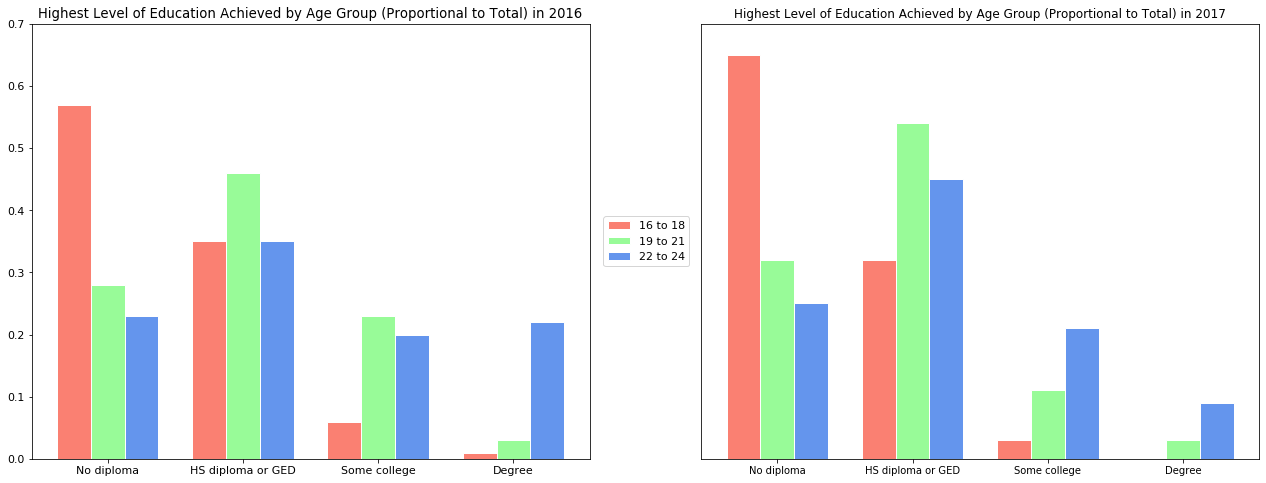

In [40]:
OY_breakdown = plt.figure(figsize=(22, 8))

# Second Axis
sub_2017 = OY_breakdown.add_subplot(122)

# set width of bar
barWidth = 0.25
 
# Set position of bar on X axis
r1 = np.arange(len(y_2017_a))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
sub_2017.bar(r1, y_2017_a, color='salmon', width=barWidth, edgecolor='white', label='16 to 18')
sub_2017.bar(r2, y_2017_b, color='palegreen', width=barWidth, edgecolor='white', label='19 to 21')
sub_2017.bar(r3, y_2017_c, color='cornflowerblue', width=barWidth, edgecolor='white', label='22 to 24')
 
plt.xticks([r + barWidth for r in range(len(y_2017_a))], x)
plt.yticks([])
plt.title('Highest Level of Education Achieved by Age Group (Proportional to Total) in 2017')
plt.rcParams.update({'font.size':11})

# First Axis
sub_2016 = OY_breakdown.add_subplot(121)

# # Set position of bar on X axis
q1 = np.arange(len(y_2016_a))
q2 = [x + barWidth for x in q1]
q3 = [x + barWidth for x in q2]
 
# # Make the plot
sub_2016.bar(q1, y_2016_a, color='salmon', width=barWidth, edgecolor='white', label='16 to 18')
sub_2016.bar(q2, y_2016_b, color='palegreen', width=barWidth, edgecolor='white', label='19 to 21')
sub_2016.bar(q3, y_2016_c, color='cornflowerblue', width=barWidth, edgecolor='white', label='22 to 24')
 
# # Add xticks on the middle of the group bars
plt.xticks([r + barWidth for r in range(len(y_2016_a))], x)
plt.title('Highest Level of Education Achieved by Age Group (Proportional to Total) in 2016')
plt.rcParams.update({'font.size':11})

# Create legends & Show graphic
sub_2016.legend(bbox_to_anchor=(1.015,0.5), loc="center left")
sub_2017.set_ylim(0,0.7)
sub_2016.set_ylim(0,0.7)

plt.show()

/Users/Vittorio/opt/anaconda3/envs/oy-env/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


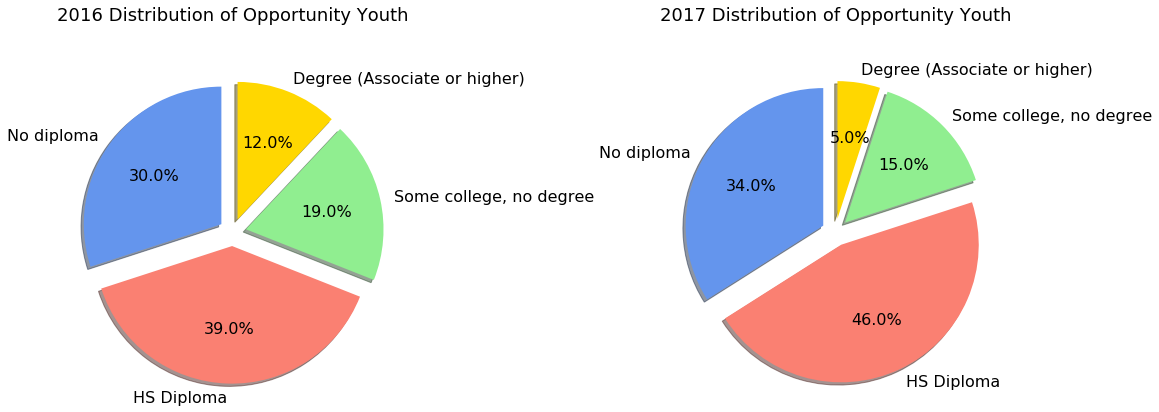

In [47]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'No diploma', 'HS Diploma', 'Some college, no degree', "Degree (Associate or higher)"
sizes_2017 = np.array([34, 46, 15, 5])
sizes_2016 = [30, 39, 19, 12]
explode = (0.1, 0.1,0.1 ,0.1)
clrs= ['cornflowerblue','salmon', 'lightgreen', 'gold']
font={'fontsize': 16}
#Set figure size and layout arrangments
plt.figure(figsize=(16, 10))
plt.subplot(122)
#2016 pie chart
ax1 = plt.subplot(121)
ax1.set_title('2016 Distribution of Opportunity Youth', pad=40, fontsize=18)
ax1.pie(sizes_2016, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops= font , colors = clrs)
#2017 pie chart
ax2 = plt.subplot(122)
ax2.set_title('2017 Distribution of Opportunity Youth', pad=40, fontsize=18)
ax2.pie(sizes_2017, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops= font , colors = clrs)
plt.tight_layout() # automatically adjust the sapcing
plt.show()


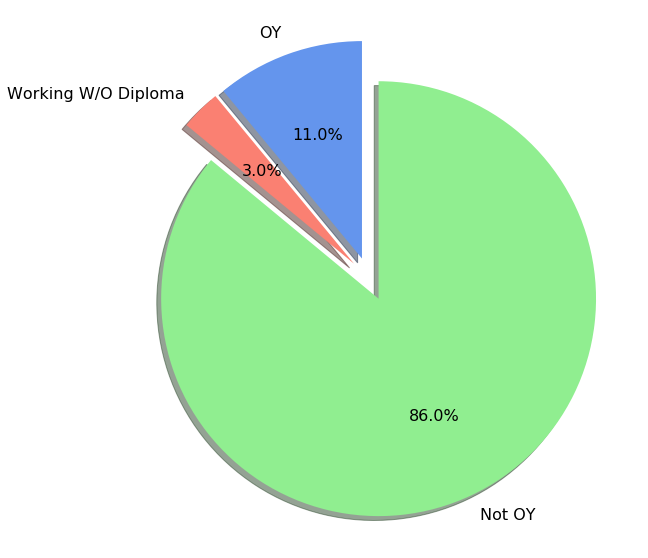

In [58]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.figure(figsize=(16, 10))
ax1 = plt.subplot()
labels = 'OY', 'Working W/O Diploma', 'Not OY'
sizes_2017 = np.array([11, 3, 86])
explode = (0.1, 0.1,0.1)
clrs= ['cornflowerblue','salmon', 'lightgreen', 'gold']
font={'fontsize': 16}
ax1.pie(sizes_2017, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops= font , colors = clrs)
plt.show()

#Set figure size and layout arrangments